# **Now Increasing the learning rate by 0.1 interval**
  1) Below code cell the learning_rate = 0.1

In [1]:
import numpy as np # For matrix math
import matplotlib.pyplot as plt # For plotting
import sys # For printing

In [2]:
# The training data.
X = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])

# The labels for the training data.
y = np.array([
    [1],
    [1],
    [0],
    [0]
])

num_i_units = 2 # Number of Input units
# num_h_units = 2 # Number of Hidden units
num_h_units = 0 # Number of Hidden units
num_o_units = 1 # Number of Output units
# The learning rate for Gradient Descent.
learning_rate = 0.1
# The parameter to help with overfitting.
reg_param = 0
# Maximum iterations for Gradient Descent.
max_iter = 600
# Number of training examples
m = 4
np.random.seed(10)
W1 = np.random.random((num_h_units,num_i_units )) #W1 to W9
W2 = np.random.random((num_o_units,num_h_units)) #W10 to W12

# W1 = np.random.no( (num_h_units, num_i_units)) # 2x2
# W2 = np.random.normal(0, 1, (num_o_units, num_h_units)) # 1x2
B1 = np.random.random((num_h_units, 1)) # 2x1
B2 = np.random.random((num_o_units, 1)) # 1x1

In [3]:
def sigmoid(z, derv=False):
    if derv: return z * (1 - z)
    return 1 / (1 + np.exp(-z))

def forward(x, predict=False):
    a1 = x.reshape(x.shape[0], 1) # Getting the training example as a column vector.

    z2 = W1.dot(a1) + B1 # 2x2 * 2x1 + 2x1 = 2x1
    a2 = sigmoid(z2) # 2x1

    z3 = W2.dot(a2) + B2 # 1x2 * 2x1 + 1x1 = 1x1
    a3 = sigmoid(z3)

    if predict: return a3
    return (a1, a2, a3)

In [4]:
dW1 = 0 # Gradient for W1
dW2 = 0 # Gradient for W2

dB1 = 0 # Gradient for B1
dB2 = 0 # Gradient for B2

cost = np.zeros((max_iter, 1)) # Column vector to record the cost of the NN after ea

In [5]:
def train(_W1, _W2, _B1, _B2): # The arguments are to bypass UnboundLocalError error
    for i in range(max_iter):
        c = 0
        
        dW1 = 0
        dW2 = 0

        dB1 = 0
        dB2 = 0
        
        for j in range(m):
            sys.stdout.write("\rIteration: {} and {}".format(i + 1, j + 1))

            # Forward Prop.
            a0 = X[j].reshape(X[j].shape[0], 1) # 2x1

            z1 = _W1.dot(a0) + _B1 # 2x2 * 2x1 + 2x1 = 2x1
            a1 = sigmoid(z1) # 2x1

            z2 = _W2.dot(a1) + _B2 # 1x2 * 2x1 + 1x1 = 1x1
            a2 = sigmoid(z2) # 1x1

            # Back prop.
            dz2 = a2 - y[j] # 1x1
            dW2 += dz2 * a1.T # 1x1 .* 1x2 = 1x2

            dz1 = np.multiply((_W2.T * dz2), sigmoid(a1, derv=True)) # (2x1 * 1x1) .* 2x1 = 2x1
            dW1 += dz1.dot(a0.T) # 2x1 * 1x2 = 2x2

            dB1 += dz1 # 2x1
            dB2 += dz2 # 1x1

            c = c + (-(y[j] * np.log(a2)) - ((1 - y[j]) * np.log(1 - a2)))
            sys.stdout.flush() # Updating the text.
        
        _W1 = _W1 - learning_rate * (dW1 / m) + ( (reg_param / m) * _W1)
        _W2 = _W2 - learning_rate * (dW2 / m) + ( (reg_param / m) * _W2)

        _B1 = _B1 - learning_rate * (dB1 / m)
        _B2 = _B2 - learning_rate * (dB2 / m)
        cost[i] = (c / m) + ( 
            (reg_param / (2 * m)) * 
            (
                np.sum(np.power(_W1, 2)) + 
                np.sum(np.power(_W2, 2))
            )
        )
    return (_W1, _W2, _B1, _B2)


In [6]:
W1, W2, B1, B2 = train(W1, W2, B1, B2)

Iteration: 600 and 4

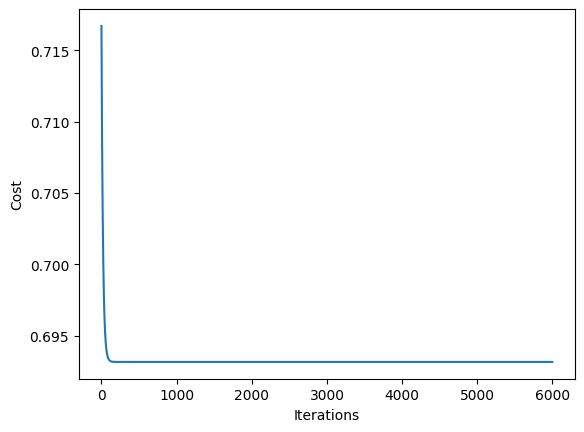

In [7]:
plt.plot(range(max_iter), cost)

# Labelling the x axis as the iterations axis.
plt.xlabel("Iterations")

# Labelling the y axis as the cost axis.
plt.ylabel("Cost")

# Showing the plot.
plt.show()

# **2) Below code cell the learning_rate = 0.2**

Iteration: 600 and 4minimum cost value: [0.68970068]


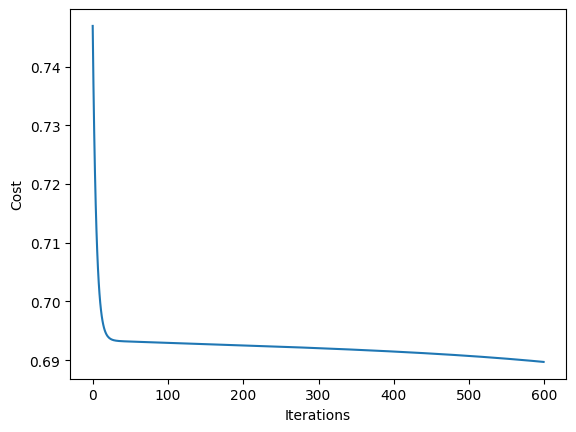

In [31]:
# The learning rate for Gradient Descent.
learning_rate = 0.2
num_h_units = 2 # Number of Hidden units
np.random.seed(10)
W1 = np.random.random((num_h_units,num_i_units )) #W1 to W9
W2 = np.random.random((num_o_units,num_h_units)) #W10 to W12

# W1 = np.random.no( (num_h_units, num_i_units)) # 2x2
# W2 = np.random.normal(0, 1, (num_o_units, num_h_units)) # 1x2
B1 = np.random.random((num_h_units, 1)) # 2x1
B2 = np.random.random((num_o_units, 1)) # 1x1
max_iter = 600
cost = np.zeros((max_iter, 1)) # Column vector to record the cost of the NN after ea
W1, W2, B1, B2 = train(W1, W2, B1, B2)
print("minimum cost value:",min(cost))
plt.plot(range(max_iter), cost)

# Labelling the x axis as the iterations axis.
plt.xlabel("Iterations")

# Labelling the y axis as the cost axis.
plt.ylabel("Cost")

# Showing the plot.
plt.show()

# **3) Below code cell the learning_rate = 0.3**

Iteration: 1000 and 4minimum cost value: [0.52285215]


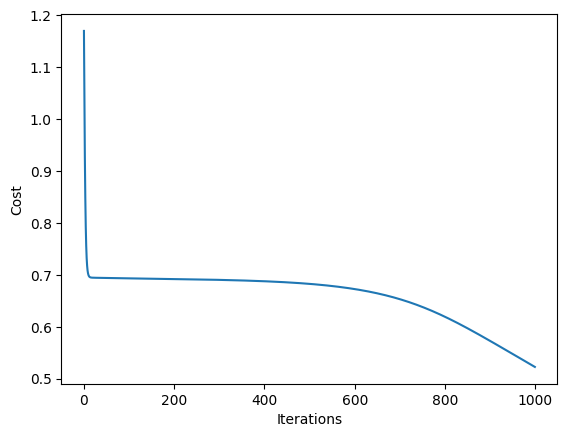

In [32]:
# The learning rate for Gradient Descent.
learning_rate = 0.3
num_h_units = 4 # Number of Hidden units
np.random.seed(10)
W1 = np.random.random((num_h_units,num_i_units )) #W1 to W9
W2 = np.random.random((num_o_units,num_h_units)) #W10 to W12
# W1 = np.random.no( (num_h_units, num_i_units)) # 2x2
# W2 = np.random.normal(0, 1, (num_o_units, num_h_units)) # 1x2
B1 = np.random.random((num_h_units, 1)) # 2x1
B2 = np.random.random((num_o_units, 1)) # 1x1
max_iter = 1000
cost = np.zeros((max_iter, 1)) # Column vector to record the cost of the NN after ea
W1, W2, B1, B2 = train(W1, W2, B1, B2)
print("minimum cost value:",min(cost))
plt.plot(range(max_iter), cost)

# Labelling the x axis as the iterations axis.
plt.xlabel("Iterations")

# Labelling the y axis as the cost axis.
plt.ylabel("Cost")

# Showing the plot.
plt.show()

# **4) Below code cell the learning_rate = 0.4**

Iteration: 1000 and 4minimum cost value: [0.32297125]


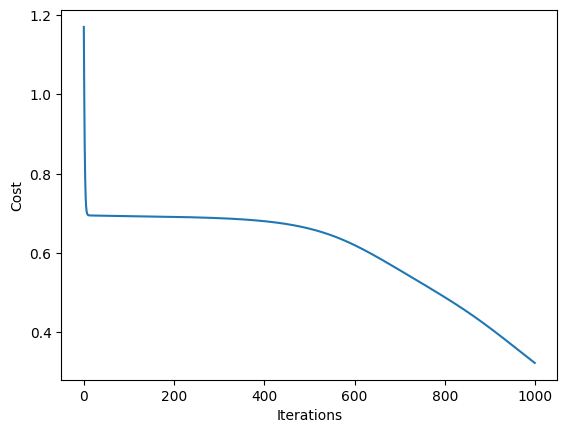

In [33]:
# The learning rate for Gradient Descent.
learning_rate = 0.4
num_h_units = 4 # Number of Hidden units
np.random.seed(10)
W1 = np.random.random((num_h_units,num_i_units )) #W1 to W9
W2 = np.random.random((num_o_units,num_h_units)) #W10 to W12

# W1 = np.random.no( (num_h_units, num_i_units)) # 2x2
# W2 = np.random.normal(0, 1, (num_o_units, num_h_units)) # 1x2
B1 = np.random.random((num_h_units, 1)) # 2x1
B2 = np.random.random((num_o_units, 1)) # 1x1
max_iter = 1000
cost = np.zeros((max_iter, 1)) # Column vector to record the cost of the NN after ea
W1, W2, B1, B2 = train(W1, W2, B1, B2)
print("minimum cost value:",min(cost))
plt.plot(range(max_iter), cost)

# Labelling the x axis as the iterations axis.
plt.xlabel("Iterations")

# Labelling the y axis as the cost axis.
plt.ylabel("Cost")

# Showing the plot.
plt.show()

# **5) Below code cell the learning_rate = 0.5**

Iteration: 1000 and 4minimum cost value: [0.15255365]


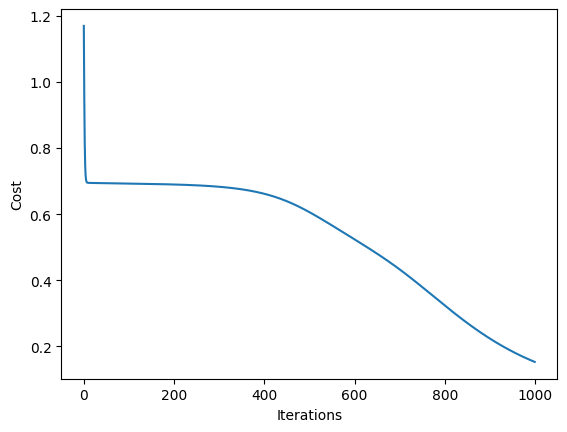

In [34]:
# The learning rate for Gradient Descent.
learning_rate = 0.5
num_h_units = 4 # Number of Hidden units
np.random.seed(10)
W1 = np.random.random((num_h_units,num_i_units )) #W1 to W9
W2 = np.random.random((num_o_units,num_h_units)) #W10 to W12

# W1 = np.random.no( (num_h_units, num_i_units)) # 2x2
# W2 = np.random.normal(0, 1, (num_o_units, num_h_units)) # 1x2
B1 = np.random.random((num_h_units, 1)) # 2x1
B2 = np.random.random((num_o_units, 1)) # 1x1
max_iter = 1000
cost = np.zeros((max_iter, 1)) # Column vector to record the cost of the NN after ea
W1, W2, B1, B2 = train(W1, W2, B1, B2)
print("minimum cost value:",min(cost))
plt.plot(range(max_iter), cost)

# Labelling the x axis as the iterations axis.
plt.xlabel("Iterations")

# Labelling the y axis as the cost axis.
plt.ylabel("Cost")

# Showing the plot.
plt.show()

# **Explantion of Increasing of leraning rate by interval 0.1.**

Increasing the learning rate can increase the model accuracy, but it can also lead to overfitting. A high learning rate can cause the model to learn the training data too well and not generalize well to new data.

A good learning rate is one that is high enough to allow the model to learn the training data quickly, but not so high that it causes overfitting. The optimal learning rate will depend on the complexity of the problem that the neural network is being trained to solve. In our case one can easily see that after every interval the cost value going down. It's mean model is learning the parameter very well.